In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv('/Users/karanbhutani/Downloads/heart.csv')

In [3]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
data.shape

(918, 12)

In [7]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
data.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<AxesSubplot:>

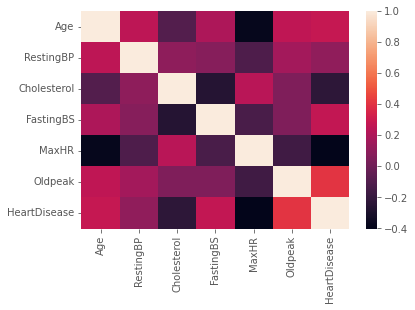

In [10]:
sns.heatmap(data.corr(), cbar=True, yticklabels=True, xticklabels=True)

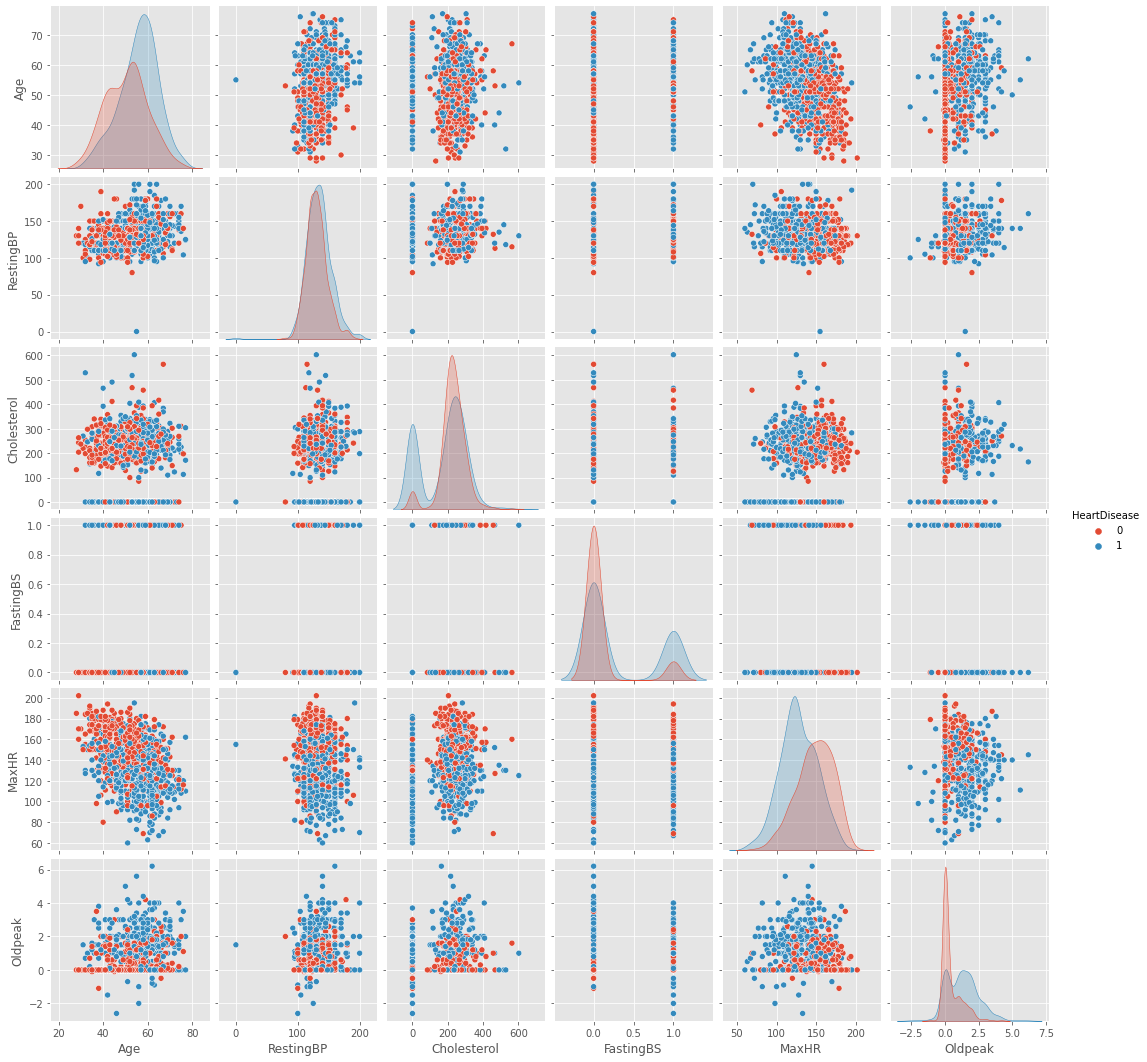

In [11]:
sns.pairplot(data, hue="HeartDisease")

<AxesSubplot:xlabel='Age', ylabel='count'>

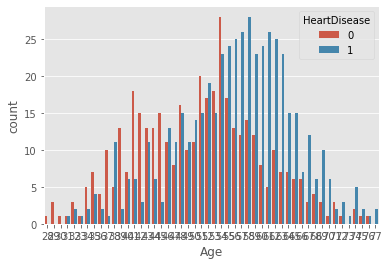

In [12]:
sns.countplot(data=data, x="Age", hue="HeartDisease")

<AxesSubplot:xlabel='RestingBP', ylabel='count'>

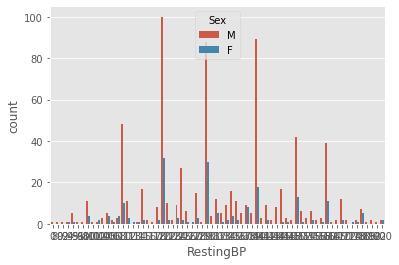

In [13]:
sns.countplot(data=data, x="RestingBP",hue="Sex")

<AxesSubplot:xlabel='Sex', ylabel='count'>

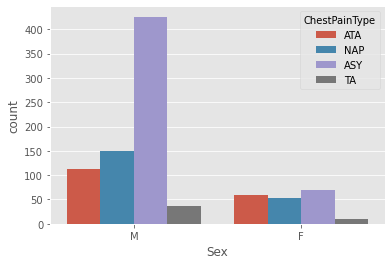

In [14]:
sns.countplot(x="Sex", hue="ChestPainType", data=data )

<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

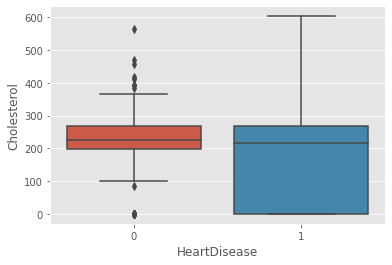

In [15]:
sns.boxplot(y="Cholesterol", x="HeartDisease", data=data)

<AxesSubplot:xlabel='FastingBS', ylabel='HeartDisease'>

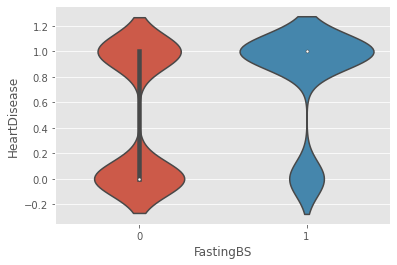

In [16]:
sns.violinplot( x = data["FastingBS"], y= data["HeartDisease"])

In [17]:
data.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

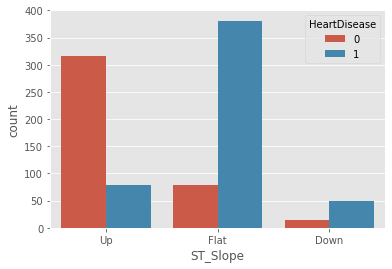

In [18]:
sns.countplot(x="ST_Slope", hue="HeartDisease", data=data)


<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

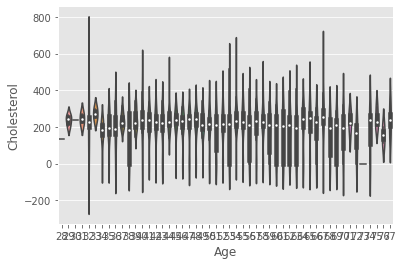

In [19]:
sns.violinplot( x = data["Age"], y= data["Cholesterol"])

In [20]:
cpt = pd.get_dummies(data['ChestPainType'],drop_first=True)

In [21]:
cpt

,ATA,NAP,TA
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,0
4,0,1,0
...,...,...,...
913,0,0,1
914,0,0,0
915,0,0,0
916,1,0,0


In [22]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
sex.head(2)

,M
0,1
1,0


In [23]:
ecg = pd.get_dummies(data['RestingECG'],drop_first=True)
ecg.head(10)

,Normal,ST
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [24]:
exang= pd.get_dummies(data['ExerciseAngina'],drop_first=True)
exang.head(10)

,Y
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0


In [25]:
stslope= pd.get_dummies(data['ST_Slope'],drop_first=True)
stslope.head(10)

,Flat,Up
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,0,1


In [26]:
data = pd.concat([data,sex,ecg,exang,stslope],axis=1)

In [27]:
data.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1, inplace=True)

In [28]:
data.head(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,M,Normal,ST,Y,Flat,Up
0,40,140,289,0,172,0.0,0,1,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,1,0,0,1,0


In [29]:
data.shape

(918, 13)

In [30]:
x = data.drop("HeartDisease", axis=1)
y = data["HeartDisease"]

In [31]:
x

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,M,Normal,ST,Y,Flat,Up
0,40,140,289,0,172,0.0,1,1,0,0,0,1
1,49,160,180,0,156,1.0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,0,1,0,0,1
3,48,138,214,0,108,1.5,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,1,1,0
916,57,130,236,0,174,0.0,0,0,0,0,1,0


In [32]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [35]:
from sklearn.linear_model import LogisticRegression


In [36]:
from sklearn.metrics import accuracy_score

In [37]:
logmodel = LogisticRegression()

In [38]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [39]:
prediction = logmodel.predict(X_test)

In [40]:
accuracy_score(y_test,prediction)*100

86.59420289855072

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf = RandomForestClassifier(max_depth=10, random_state=0, verbose = 1, n_jobs = 4, max_features="log2")
clf.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(max_depth=10, max_features='log2', n_jobs=4,
                       random_state=0, verbose=1)

In [43]:
y_pred = clf.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [44]:
y_pred2 = clf.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [45]:
y_train_preds = clf.predict(X_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [46]:
np.mean(y_train == y_train_preds)* 100

99.37694704049844

In [47]:
from sklearn.ensemble import AdaBoostRegressor

In [48]:
from sklearn.datasets import make_regression

In [49]:
X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr = AdaBoostRegressor(random_state=0, n_estimators=100)

In [50]:
regr.fit(X, y)
AdaBoostRegressor(n_estimators=100, random_state=0)
regr.predict([[0, 0, 0, 0]])

array([4.79722349])

In [51]:
regr.score(X,y)*100

97.71376939813695

In [52]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

In [54]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

In [55]:
clf.score(X_test, y_test)*100

91.3

In [56]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [57]:
y_pred3 = classifier.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

TypeError: Expected sequence or array-like, got <class 'sklearn.ensemble._forest.RandomForestClassifier'>